# Importing Modules


In [80]:

from __future__ import print_function, division

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import kde
from os.path import basename
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.layers import Input
from keras.models import Model
from keras.optimizers.legacy import Adam, SGD
import keras
from keras import Input, Model
from keras.layers import Dense, LeakyReLU, concatenate, Flatten
from keras.initializers import RandomUniform, he_normal, he_uniform, RandomNormal
import tensorflow 
import keras
import xgboost as xgb


from tensorflow.keras.losses import Huber, MeanSquaredLogarithmicError, MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.layers import Dense, Activation, LayerNormalization
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard


sns.set()

In [81]:
#Random Seed for Random related operations
random_seed = 10


In [82]:
#Load the Dataset
data = pd.read_csv("./finalvalues.csv")
data


,a_L,b_L,c_L,unloading_fit,a_UL,b_UL,c_UL,d_UL,e_UL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
0,0.000832,29.831876,1.745836e+05,exponential,1.840000e-05,36.449848,-6.474227e+06,0.0,0.0,7.011116e+07,8223.858084,0.498493,4.323757
1,8444.173878,6.327991,2.576911e+09,exponential,7.660774e+03,6.413528,5.816923e+10,0.0,0.0,5.401309e+07,19668.618610,0.093948,1.315648
2,0.168472,5.910410,1.139450e+05,exponential,1.345378e-01,6.251730,9.942353e+05,0.0,0.0,5.482073e+03,2950.606120,0.073838,3.899846
3,0.000041,24.050022,1.282441e+03,exponential,8.760000e-07,30.731920,-7.455532e+03,0.0,0.0,8.608225e+04,9263.723118,0.480637,2.795725
4,0.077970,8.943098,3.101440e+03,exponential,5.194179e-02,9.582162,8.669050e+05,0.0,0.0,7.167766e+03,9483.627267,0.254804,2.122948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,615.765227,7.279871,6.714457e+07,exponential,5.300471e+02,7.468861,5.157096e+09,0.0,0.0,1.592402e+07,9888.101792,0.164368,3.788761
4270,0.761134,9.005207,8.858084e+03,exponential,5.936149e-01,9.309353,8.363363e+06,0.0,0.0,8.847130e+04,7754.975886,0.254396,1.148124
4271,0.014597,22.643753,8.382914e+04,exponential,4.797280e-03,24.516390,-2.703734e+05,0.0,0.0,1.333551e+07,7163.301750,0.454451,1.003260
4272,633.537361,9.814582,5.406475e+05,exponential,4.356185e+02,10.421106,7.772276e+09,0.0,0.0,6.325126e+07,15632.917930,0.278295,0.216698


In [83]:
linear_data = data[data["unloading_fit"]=="linear"]
linear_data


,a_L,b_L,c_L,unloading_fit,a_UL,b_UL,c_UL,d_UL,e_UL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
5,1.529010,5.097258,193418.12270,linear,0.0,0.0,0.0,-1.200167e+09,5.769557e+08,8.092324e+07,15739.666550,0.949367,4.099891
6,1.414344,5.092446,211004.28450,linear,0.0,0.0,0.0,-7.329262e+08,3.422365e+08,7.522061e+07,12135.972990,0.986818,3.171285
9,0.749460,5.419754,114085.47820,linear,0.0,0.0,0.0,-9.678340e+08,4.900926e+08,4.362527e+07,14673.879690,0.798775,4.654091
13,0.778836,5.481481,122284.63560,linear,0.0,0.0,0.0,-1.497469e+08,6.772297e+07,4.844027e+07,11222.781110,0.789267,1.398423
25,0.116184,5.748584,60986.94783,linear,0.0,0.0,0.0,-4.409067e+06,1.704813e+06,8.016211e+06,9587.986174,0.729210,0.516495
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1.160278,5.522256,168651.72850,linear,0.0,0.0,0.0,-2.324239e+08,1.070411e+08,7.328677e+07,19698.545870,0.784871,1.308693
4252,0.311634,5.255421,61243.81521,linear,0.0,0.0,0.0,-5.296617e+07,2.201263e+07,1.761834e+07,1860.740379,0.869007,2.110462
4257,1.375291,5.138302,206825.51630,linear,0.0,0.0,0.0,-4.779202e+08,2.141023e+08,7.453658e+07,12769.745370,0.930616,2.663894
4260,0.153166,5.071595,56467.06945,linear,0.0,0.0,0.0,-3.683266e+07,1.395658e+07,7.983916e+06,4413.527619,0.981386,3.732074


In [84]:
data = pd.concat([data, linear_data])
data = pd.concat([data, linear_data])
data

,a_L,b_L,c_L,unloading_fit,a_UL,b_UL,c_UL,d_UL,e_UL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
0,0.000832,29.831876,1.745836e+05,exponential,1.840000e-05,36.449848,-6.474227e+06,0.000000e+00,0.000000e+00,7.011116e+07,8223.858084,0.498493,4.323757
1,8444.173878,6.327991,2.576911e+09,exponential,7.660774e+03,6.413528,5.816923e+10,0.000000e+00,0.000000e+00,5.401309e+07,19668.618610,0.093948,1.315648
2,0.168472,5.910410,1.139450e+05,exponential,1.345378e-01,6.251730,9.942353e+05,0.000000e+00,0.000000e+00,5.482073e+03,2950.606120,0.073838,3.899846
3,0.000041,24.050022,1.282441e+03,exponential,8.760000e-07,30.731920,-7.455532e+03,0.000000e+00,0.000000e+00,8.608225e+04,9263.723118,0.480637,2.795725
4,0.077970,8.943098,3.101440e+03,exponential,5.194179e-02,9.582162,8.669050e+05,0.000000e+00,0.000000e+00,7.167766e+03,9483.627267,0.254804,2.122948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1.160278,5.522256,1.686517e+05,linear,0.000000e+00,0.000000,0.000000e+00,-2.324239e+08,1.070411e+08,7.328677e+07,19698.545870,0.784871,1.308693
4252,0.311634,5.255421,6.124382e+04,linear,0.000000e+00,0.000000,0.000000e+00,-5.296617e+07,2.201263e+07,1.761834e+07,1860.740379,0.869007,2.110462
4257,1.375291,5.138302,2.068255e+05,linear,0.000000e+00,0.000000,0.000000e+00,-4.779202e+08,2.141023e+08,7.453658e+07,12769.745370,0.930616,2.663894
4260,0.153166,5.071595,5.646707e+04,linear,0.000000e+00,0.000000,0.000000e+00,-3.683266e+07,1.395658e+07,7.983916e+06,4413.527619,0.981386,3.732074


In [85]:
data["unloading_fit"].replace("linear", 0,inplace=True)
data["unloading_fit"].replace("exponential", 1,inplace=True)

data["unloading_fit"] = data["unloading_fit"].astype(int)
data

,a_L,b_L,c_L,unloading_fit,a_UL,b_UL,c_UL,d_UL,e_UL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
0,0.000832,29.831876,1.745836e+05,1,1.840000e-05,36.449848,-6.474227e+06,0.000000e+00,0.000000e+00,7.011116e+07,8223.858084,0.498493,4.323757
1,8444.173878,6.327991,2.576911e+09,1,7.660774e+03,6.413528,5.816923e+10,0.000000e+00,0.000000e+00,5.401309e+07,19668.618610,0.093948,1.315648
2,0.168472,5.910410,1.139450e+05,1,1.345378e-01,6.251730,9.942353e+05,0.000000e+00,0.000000e+00,5.482073e+03,2950.606120,0.073838,3.899846
3,0.000041,24.050022,1.282441e+03,1,8.760000e-07,30.731920,-7.455532e+03,0.000000e+00,0.000000e+00,8.608225e+04,9263.723118,0.480637,2.795725
4,0.077970,8.943098,3.101440e+03,1,5.194179e-02,9.582162,8.669050e+05,0.000000e+00,0.000000e+00,7.167766e+03,9483.627267,0.254804,2.122948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1.160278,5.522256,1.686517e+05,0,0.000000e+00,0.000000,0.000000e+00,-2.324239e+08,1.070411e+08,7.328677e+07,19698.545870,0.784871,1.308693
4252,0.311634,5.255421,6.124382e+04,0,0.000000e+00,0.000000,0.000000e+00,-5.296617e+07,2.201263e+07,1.761834e+07,1860.740379,0.869007,2.110462
4257,1.375291,5.138302,2.068255e+05,0,0.000000e+00,0.000000,0.000000e+00,-4.779202e+08,2.141023e+08,7.453658e+07,12769.745370,0.930616,2.663894
4260,0.153166,5.071595,5.646707e+04,0,0.000000e+00,0.000000,0.000000e+00,-3.683266e+07,1.395658e+07,7.983916e+06,4413.527619,0.981386,3.732074


In [86]:
# data.drop(columns=["unloading_fit"], inplace=True )
data

,a_L,b_L,c_L,unloading_fit,a_UL,b_UL,c_UL,d_UL,e_UL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
0,0.000832,29.831876,1.745836e+05,1,1.840000e-05,36.449848,-6.474227e+06,0.000000e+00,0.000000e+00,7.011116e+07,8223.858084,0.498493,4.323757
1,8444.173878,6.327991,2.576911e+09,1,7.660774e+03,6.413528,5.816923e+10,0.000000e+00,0.000000e+00,5.401309e+07,19668.618610,0.093948,1.315648
2,0.168472,5.910410,1.139450e+05,1,1.345378e-01,6.251730,9.942353e+05,0.000000e+00,0.000000e+00,5.482073e+03,2950.606120,0.073838,3.899846
3,0.000041,24.050022,1.282441e+03,1,8.760000e-07,30.731920,-7.455532e+03,0.000000e+00,0.000000e+00,8.608225e+04,9263.723118,0.480637,2.795725
4,0.077970,8.943098,3.101440e+03,1,5.194179e-02,9.582162,8.669050e+05,0.000000e+00,0.000000e+00,7.167766e+03,9483.627267,0.254804,2.122948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1.160278,5.522256,1.686517e+05,0,0.000000e+00,0.000000,0.000000e+00,-2.324239e+08,1.070411e+08,7.328677e+07,19698.545870,0.784871,1.308693
4252,0.311634,5.255421,6.124382e+04,0,0.000000e+00,0.000000,0.000000e+00,-5.296617e+07,2.201263e+07,1.761834e+07,1860.740379,0.869007,2.110462
4257,1.375291,5.138302,2.068255e+05,0,0.000000e+00,0.000000,0.000000e+00,-4.779202e+08,2.141023e+08,7.453658e+07,12769.745370,0.930616,2.663894
4260,0.153166,5.071595,5.646707e+04,0,0.000000e+00,0.000000,0.000000e+00,-3.683266e+07,1.395658e+07,7.983916e+06,4413.527619,0.981386,3.732074


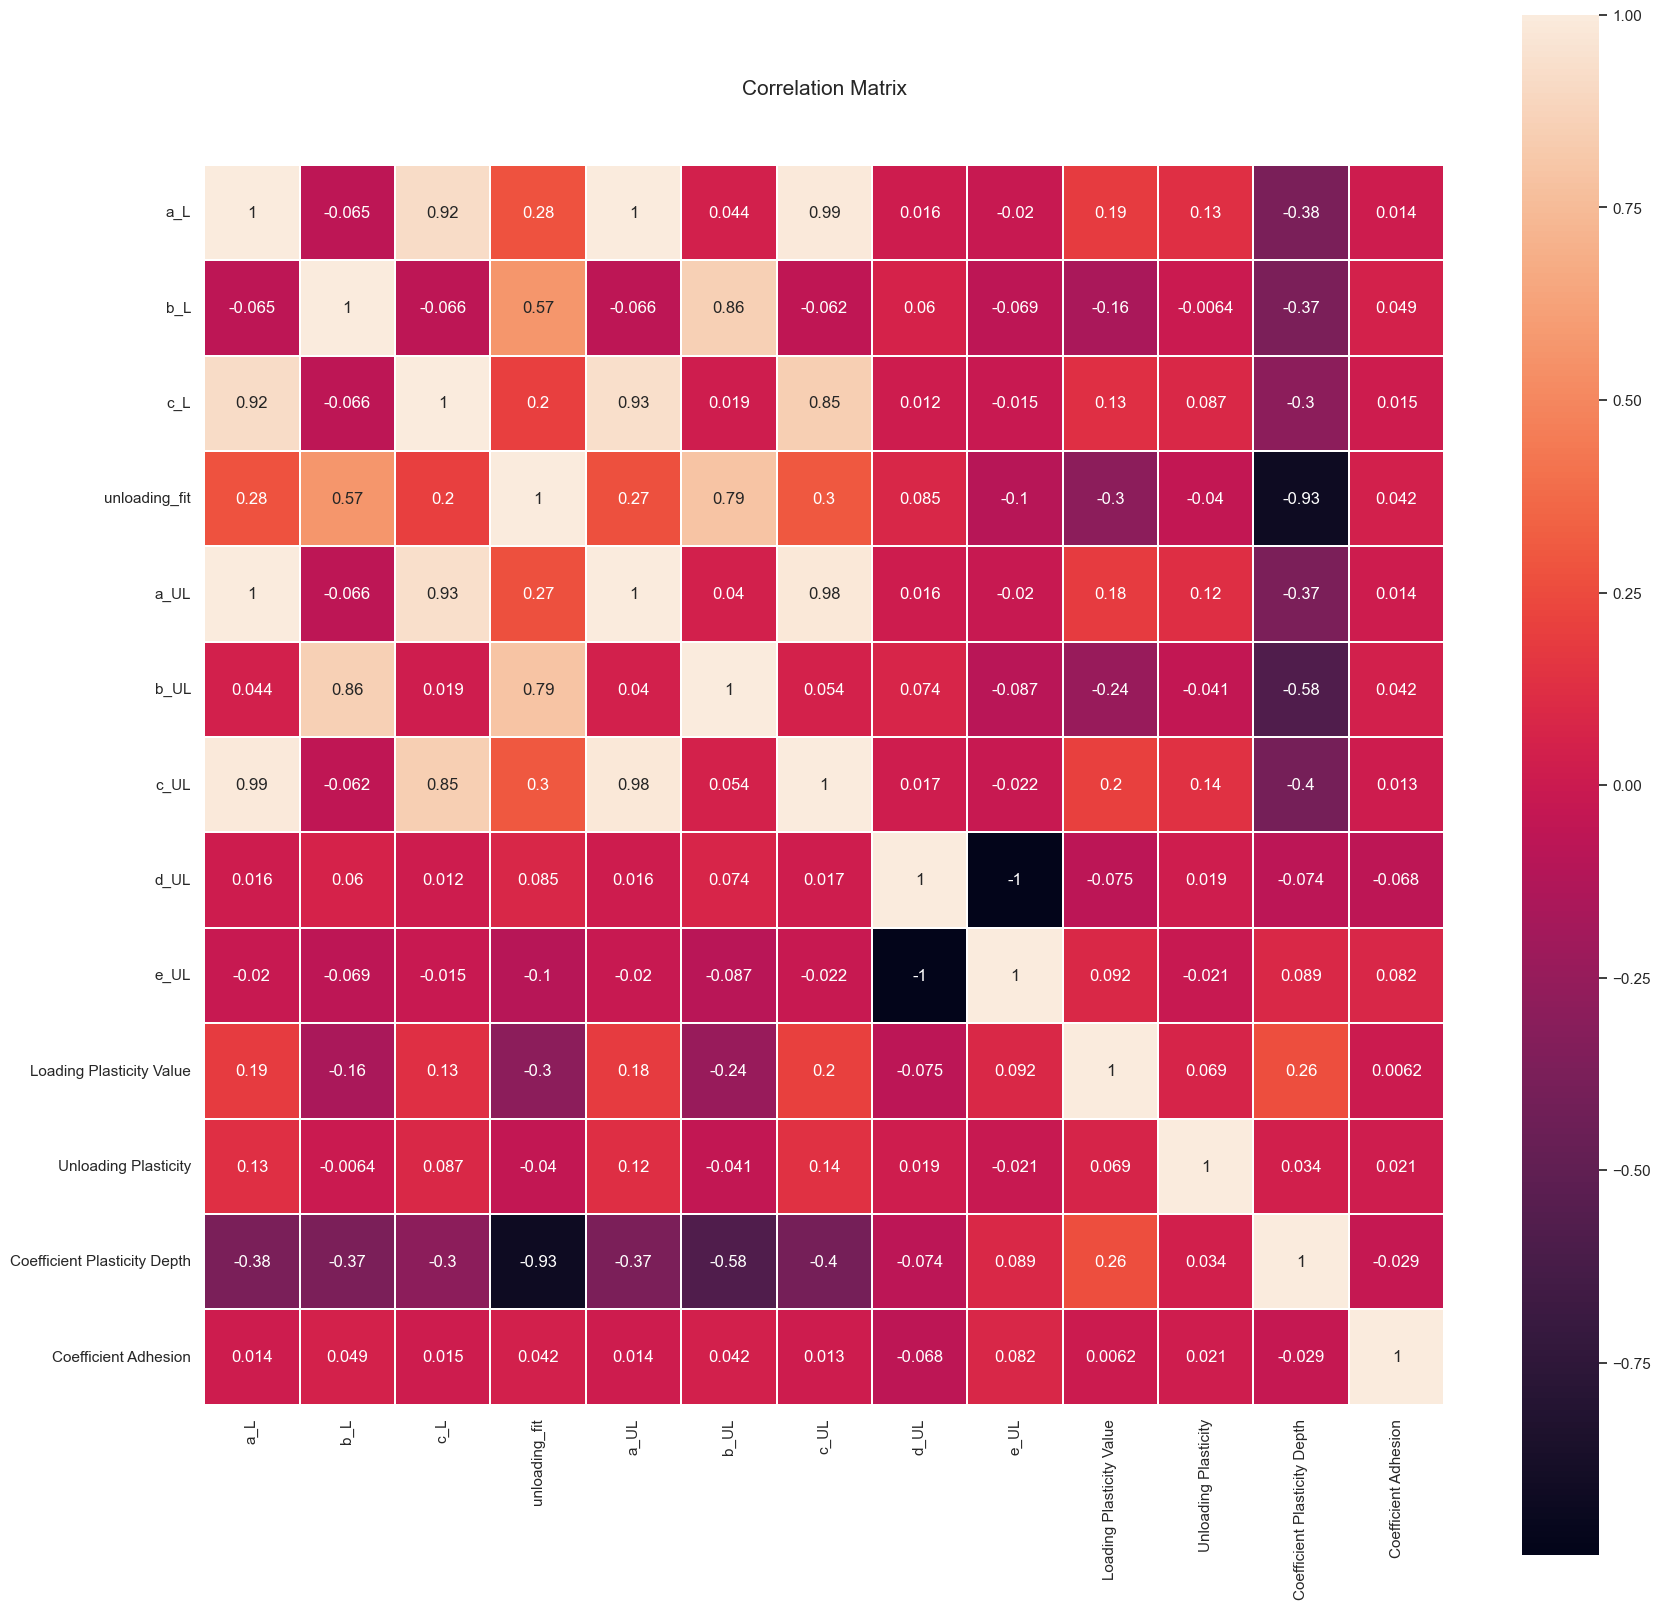

In [87]:
#Plot Correlation Plot to see Correlation of Columns
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)
plt.show()

In [88]:
# data.to_csv("processed.csv")

In [89]:
# #Column Names to be used for Output
# column_name = ['Loading Plasticity Value','Unloading Plasticity', 'Coefficient Plasticity Depth' ,'Coefficient Adhesion']


# label = data[column_name]

# #Drop Columns from dataframe which are used for output
# data.drop(columns=column_name,inplace=True)

# data

In [90]:
all_old_names = data.columns.to_list()
all_old_names

['a_L',
 'b_L',
 'c_L',
 'unloading_fit',
 'a_UL',
 'b_UL',
 'c_UL',
 'd_UL',
 'e_UL',
 'Loading Plasticity Value',
 'Unloading Plasticity',
 'Coefficient Plasticity Depth',
 'Coefficient Adhesion']

In [91]:
all_new_names = []
for names in all_old_names:
    all_new_names.append(names.replace("_", ""))

all_new_names

['aL',
 'bL',
 'cL',
 'unloadingfit',
 'aUL',
 'bUL',
 'cUL',
 'dUL',
 'eUL',
 'Loading Plasticity Value',
 'Unloading Plasticity',
 'Coefficient Plasticity Depth',
 'Coefficient Adhesion']

In [92]:
update_name_dict = dict()

for old,new in zip(all_old_names, all_new_names):
    update_name_dict[old] = new

update_name_dict

{'a_L': 'aL',
 'b_L': 'bL',
 'c_L': 'cL',
 'unloading_fit': 'unloadingfit',
 'a_UL': 'aUL',
 'b_UL': 'bUL',
 'c_UL': 'cUL',
 'd_UL': 'dUL',
 'e_UL': 'eUL',
 'Loading Plasticity Value': 'Loading Plasticity Value',
 'Unloading Plasticity': 'Unloading Plasticity',
 'Coefficient Plasticity Depth': 'Coefficient Plasticity Depth',
 'Coefficient Adhesion': 'Coefficient Adhesion'}

In [93]:

data.rename(columns=update_name_dict, inplace=True)
data

,aL,bL,cL,unloadingfit,aUL,bUL,cUL,dUL,eUL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
0,0.000832,29.831876,1.745836e+05,1,1.840000e-05,36.449848,-6.474227e+06,0.000000e+00,0.000000e+00,7.011116e+07,8223.858084,0.498493,4.323757
1,8444.173878,6.327991,2.576911e+09,1,7.660774e+03,6.413528,5.816923e+10,0.000000e+00,0.000000e+00,5.401309e+07,19668.618610,0.093948,1.315648
2,0.168472,5.910410,1.139450e+05,1,1.345378e-01,6.251730,9.942353e+05,0.000000e+00,0.000000e+00,5.482073e+03,2950.606120,0.073838,3.899846
3,0.000041,24.050022,1.282441e+03,1,8.760000e-07,30.731920,-7.455532e+03,0.000000e+00,0.000000e+00,8.608225e+04,9263.723118,0.480637,2.795725
4,0.077970,8.943098,3.101440e+03,1,5.194179e-02,9.582162,8.669050e+05,0.000000e+00,0.000000e+00,7.167766e+03,9483.627267,0.254804,2.122948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1.160278,5.522256,1.686517e+05,0,0.000000e+00,0.000000,0.000000e+00,-2.324239e+08,1.070411e+08,7.328677e+07,19698.545870,0.784871,1.308693
4252,0.311634,5.255421,6.124382e+04,0,0.000000e+00,0.000000,0.000000e+00,-5.296617e+07,2.201263e+07,1.761834e+07,1860.740379,0.869007,2.110462
4257,1.375291,5.138302,2.068255e+05,0,0.000000e+00,0.000000,0.000000e+00,-4.779202e+08,2.141023e+08,7.453658e+07,12769.745370,0.930616,2.663894
4260,0.153166,5.071595,5.646707e+04,0,0.000000e+00,0.000000,0.000000e+00,-3.683266e+07,1.395658e+07,7.983916e+06,4413.527619,0.981386,3.732074


In [94]:
# # Do Simle Feature Extraction hoping this will help model output
data["abL"] = data["aL"]/data["bL"]
data["acL"] = data["aL"]/data["cL"]

data["baL"] = data["bL"]/data["aL"]
data["bcL"] = data["bL"]/data["cL"]

data["cbL"] = data["cL"]/data["bL"]
data["caL"] = data["cL"]/data["aL"]



data

,aL,bL,cL,unloadingfit,aUL,bUL,cUL,dUL,eUL,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion,abL,acL,baL,bcL,cbL,caL
0,0.000832,29.831876,1.745836e+05,1,1.840000e-05,36.449848,-6.474227e+06,0.000000e+00,0.000000e+00,7.011116e+07,8223.858084,0.498493,4.323757,0.000028,4.768330e-09,35835.290568,1.708745e-04,5.852249e+03,2.097170e+08
1,8444.173878,6.327991,2.576911e+09,1,7.660774e+03,6.413528,5.816923e+10,0.000000e+00,0.000000e+00,5.401309e+07,19668.618610,0.093948,1.315648,1334.416230,3.276859e-06,0.000749,2.455650e-09,4.072242e+08,3.051703e+05
2,0.168472,5.910410,1.139450e+05,1,1.345378e-01,6.251730,9.942353e+05,0.000000e+00,0.000000e+00,5.482073e+03,2950.606120,0.073838,3.899846,0.028504,1.478537e-06,35.082469,5.187072e-05,1.927870e+04,6.763444e+05
3,0.000041,24.050022,1.282441e+03,1,8.760000e-07,30.731920,-7.455532e+03,0.000000e+00,0.000000e+00,8.608225e+04,9263.723118,0.480637,2.795725,0.000002,3.165837e-08,592365.068966,1.875331e-02,5.332392e+01,3.158723e+07
4,0.077970,8.943098,3.101440e+03,1,5.194179e-02,9.582162,8.669050e+05,0.000000e+00,0.000000e+00,7.167766e+03,9483.627267,0.254804,2.122948,0.008718,2.513997e-05,114.699080,2.883531e-03,3.467971e+02,3.977730e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1.160278,5.522256,1.686517e+05,0,0.000000e+00,0.000000,0.000000e+00,-2.324239e+08,1.070411e+08,7.328677e+07,19698.545870,0.784871,1.308693,0.210109,6.879727e-06,4.759426,3.274355e-05,3.054037e+04,1.453546e+05
4252,0.311634,5.255421,6.124382e+04,0,0.000000e+00,0.000000,0.000000e+00,-5.296617e+07,2.201263e+07,1.761834e+07,1860.740379,0.869007,2.110462,0.059298,5.088410e-06,16.864101,8.581146e-05,1.165345e+04,1.965250e+05
4257,1.375291,5.138302,2.068255e+05,0,0.000000e+00,0.000000,0.000000e+00,-4.779202e+08,2.141023e+08,7.453658e+07,12769.745370,0.930616,2.663894,0.267655,6.649523e-06,3.736156,2.484365e-05,4.025173e+04,1.503867e+05
4260,0.153166,5.071595,5.646707e+04,0,0.000000e+00,0.000000,0.000000e+00,-3.683266e+07,1.395658e+07,7.983916e+06,4413.527619,0.981386,3.732074,0.030201,2.712483e-06,33.111768,8.981509e-05,1.113399e+04,3.686660e+05


In [96]:
data.to_csv("processed.csv", index=False)

In [42]:
#Store the name of Columns, it will be used while ploting Output Graphs
op_column_names = label.columns.to_list()

In [43]:
label

,Loading Plasticity Value,Unloading Plasticity,Coefficient Plasticity Depth,Coefficient Adhesion
0,7.011116e+07,8223.858084,0.498493,4.323757
1,5.401309e+07,19668.618610,0.093948,1.315648
2,5.482073e+03,2950.606120,0.073838,3.899846
3,8.608225e+04,9263.723118,0.480637,2.795725
4,7.167766e+03,9483.627267,0.254804,2.122948
...,...,...,...,...
4247,7.328677e+07,19698.545870,0.784871,1.308693
4252,1.761834e+07,1860.740379,0.869007,2.110462
4257,7.453658e+07,12769.745370,0.930616,2.663894
4260,7.983916e+06,4413.527619,0.981386,3.732074


In [44]:
#Convert Data to Numpy Array (Not Important for ML Models)
data = data.to_numpy()
label = label.to_numpy()

#Split the Dataset in test Train at a ration of 70:30
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.15, random_state=random_seed)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5849, 15) (5849, 4)
(1033, 15) (1033, 4)


In [45]:
#Scaling the Input and Output if needed

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)



# scaler2 = StandardScaler()
# y_train = scaler2.fit_transform(y_train)
# y_test = scaler2.transform(y_test)


In [46]:

#Train the Model with necessary Parameters
#Refer: https://xgboost.readthedocs.io/en/stable/parameter.html

xg_reg = xgb.XGBRegressor(n_estimators = 3000, max_depth = 500, max_leaves=0, learning_rate=0.0095, booster="gbtree", random_state=random_seed, alpha = 5)
xg_reg.fit(X_train,y_train)


XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0095, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=500, max_leaves=0,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [47]:
#Test Set Prediction

ypred_xg = xg_reg.predict(X_test)

In [48]:
# Calculate few Performance Metrics
xg_mae = mean_absolute_error(ypred_xg, y_test)
xg_rmse = math.sqrt(mean_squared_error(ypred_xg, y_test))
xg_mape = mean_absolute_percentage_error(ypred_xg, y_test)

print("XGB MAE:", xg_mae)
print("XGB RMSE:", xg_rmse)
print("XGB MAPE:", xg_mape, "%")

XGB MAE: 822248.5014607447
XGB RMSE: 4357979.308266548
XGB MAPE: 0.22035899729436292 %


In [50]:
# Seperate all 4 output columns from test Data
try:
    col_1 = y_test[:,:1]
except:
    pass
try:
    col_2 = y_test[:,1:2]
except:
    pass

try:
    col_3 = y_test[:,2:3]
except:
    pass

try:
    col_4 = y_test[:,3:]
except:
    pass



# Seperate all 4 output columns from Predicted Data
try:
    pred_col_1 = ypred_xg[:,:1]
except:
    pass

try:
    pred_col_2 = ypred_xg[:,1:2]
except:
    pass

try:
    pred_col_3 = ypred_xg[:,2:3]
except:
    pass

try:
    pred_col_4 = ypred_xg[:,3:]
except:
    pass

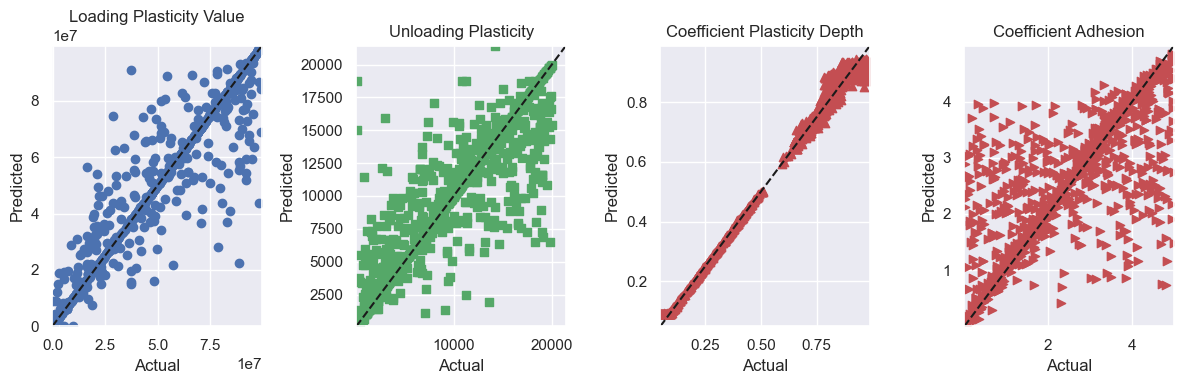

In [51]:
# Create scatter plots for all 4 Columns
plt.figure(figsize=(12, 4))

try:
    plt.subplot(141)
    x_min_a = min(col_1.min(), pred_col_1.min())
    x_max_a = max(col_1.max(), pred_col_1.max())
    plt.scatter(col_1, pred_col_1, c='b', marker='o')
    plt.plot([x_min_a, x_max_a], [x_min_a, x_max_a], 'k--')  # Diagonal line
    plt.xlim(x_min_a, x_max_a)
    plt.ylim(x_min_a, x_max_a)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(op_column_names[0])
except:
    pass

try:
    plt.subplot(142)
    x_min_b = min(col_2.min(), pred_col_2.min())
    x_max_b = max(col_2.max(), pred_col_2.max())
    plt.scatter(col_2, pred_col_2, c='g', marker='s')
    plt.plot([x_min_b, x_max_b], [x_min_b, x_max_b], 'k--')  # Diagonal line
    plt.xlim(x_min_b, x_max_b)
    plt.ylim(x_min_b, x_max_b)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(op_column_names[1])
except:
    pass


try:
    plt.subplot(143)
    x_min_c = min(col_3.min(), pred_col_3.min())
    x_max_c = max(col_3.max(), pred_col_3.max())
    plt.scatter(col_3, pred_col_3, c='r', marker='^')
    plt.plot([x_min_c, x_max_c], [x_min_c, x_max_c], 'k--')  # Diagonal line
    plt.xlim(x_min_c, x_max_c)
    plt.ylim(x_min_c, x_max_c)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(op_column_names[2])
except:
    pass


try:
    plt.subplot(144)
    x_min_d = min(col_4.min(), pred_col_4.min())
    x_max_d = max(col_4.max(), pred_col_4.max())
    plt.scatter(col_4, pred_col_4, c='r', marker='>')
    plt.plot([x_min_d, x_max_d], [x_min_d, x_max_d], 'k--')  # Diagonal line
    plt.xlim(x_min_d, x_max_d)
    plt.ylim(x_min_d, x_max_d)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(op_column_names[3])
except:
    pass


plt.tight_layout()

plt.show()